In [3]:
from author_style.utils import *

In [4]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import unidecode
#import spacy
import numpy as np
import pandas as pd

In [3]:
#clean_texts_large()

In [92]:
seq_len = 512

df = csv_to_dataframes(output='c', MAX_LEN=seq_len)

In [93]:
pd.options.display.max_rows = 5
pd.options.display.max_seq_items = None
pd.options.display.max_colwidth = 4000
df

,text,author,title,book_date
0,"Pendant que Nous franchissions la porte du Nord, dédiée à Ishtar, déesse de la Fécondité, la Vierge, toujours l’esprit en éveil, Me donna une idée qui reçut immédiatement force de loi. Pour compenser la fatigue que pourrait causer le jacassement universel, la dernière semaine de chaque mois serait vouée entièrement au silence. Un silence de rêve suspendrait, sur la terre, le grondement des mers, le fracas des cascades, le souffle des vents, le vrombissement des avions, le bruit des trains, des voitures, des machines. Il éteindrait, dans l’univers, la musique des sphères et tout frémissement de vie. Cette semaine mensuelle de silence serait vouée à l’amour. En retenant leur souffle, les amoureux redoubleraient de regards, de caresses. Ils ne seraient plus que rayonnements d’âme, scintillements d’indicible. Quand ils retourneraient au monde de la parole, ils garderaient une telle nostalgie du silence qu’ils croiraient en dire infiniment moins avec leurs mots qu’auparavant avec leurs yeux. Les plus nostalgiques seront les perroquets. Et surtout Kohkoh, perroquet en chef de Nabuchodonosor, qui s’était illustré en chantant des hymnes, des psaumes et les chefs-d’œuvre de la poésie de Babylone. Après chaque cure de silence, il était si malheureux d’avoir à parler en service commandé que, pour clore son bec à jamais, il finit par le plonger dans un ciment indestructible. Pleuré par le roi et par tout le royaume, il mourut d’amour du silence et du silence de l’amour. [sep] « En 486 après Jésus-Christ, les troupes de Syagrius avaient enlevé d’une église un vase d’une grandeur et d’une beauté merveilleuse, avec tous les autres ornements du ministère sacré. L’évêque de cette ville envoya au roi Clovis des messagers demandant que, s’ils ne pouvaient obtenir de recouvrer les autres vases, on lui rendît au moins celui-là. Aux paroles de l’envoyé le roi répondit : “ Suis-nous jusqu’à Soissons car c est là que sera partagé le butin ; et quand ce vase sera entré dans ma part, je ferai ce que l’évêque demande. ” En arrivant à Soissons, le roi fit déposer la charge du butin au milieu de ses soldats et dit : “ Je vous prie, mes braves guerriers, de bien vouloir m’accorder, hors part7, le vase que voilà ”, et il montrait le vase dont nous avons parlé. A ces paroles, les plus sensés répondirent : “ Glorieux roi, tout ce que nous avons ici est à toi, et nous-mêmes sommes soumis à ton pouvoir ; qu’il en soit donc fait selon ton jugement car personne ne peut résister à ta puissance. ” Comme ils avaient ainsi parlé, l’un des soldats, léger, jaloux et emporté, éleva la voix, brandit la hache à deux tranchants et frappa le vase en disant : “ Tu n’auras rien de plus que ce qui te sera donné véritablement par le sort. ” Tous restèrent stupéfaits. Le roi comprima l’outrage, avec une patiente douceur, et le vase lui étant échu, il le rendit à l’envoyé de l’évêque, gardant la blessure dans son cœur. [sep] Van Eyck présenta La Vierge au chanoine Van der Paele, avec le chanoine lui-même,",GUTH Paul,Si j_étais le Bon Dieu,1987
1,"la Vierge à la fontaine et, avec le chancelier en personne, « gros et gras, le teint frais et la bouche vermeille », la Vierge au chancelier Rolin. Pour mieux contempler ce chef-d’œuvre, Je fis arrêter le cortège. Sérénité de la Vierge peinte dans son grand manteau rouge. Ce regard en biais, attentif, de sage et discrète personne, empêchant, du bout des doigts, l’Enfant de glisser sur son genou et s’apprêtant à lui donner l’envol. Les magiques cheveux d’or crespelés cascadant sur les épaules. Au-dessus de sa tête, un ange élève une couronne à faire pâlir d’envie saint Éloi. Un immense joyau arachnéen, une dentelle d’or, un souffle de filigranes, royauté des cieux. Et puis le coup de génie, que J’ai inspiré, auquel Van Eyck a obéi, autant que le permettaient ses forces : la Vierge à l’Enfant est assise dans la pénombre d’une loggia, à l’angle de laquelle l’ange se niche comme une hirondelle. Des arceaux s’

In [94]:
data = df[["text","author"]]

In [64]:
data.shape

(4862, 2)

In [95]:
data["taille"] = data.text.apply(lambda x : len(x.split(" ")))
data.head(2)

/var/folders/t8/clhcfp2n5sgcs4b81syf8xym0000gp/T/ipykernel_22713/3158990497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["taille"] = data.text.apply(lambda x : len(x.split(" ")))


,text,author,taille
0,"Pendant que Nous franchissions la porte du Nord, dédiée à Ishtar, déesse de la Fécondité, la Vierge, toujours l’esprit en éveil, Me donna une idée qui reçut immédiatement force de loi. Pour compenser la fatigue que pourrait causer le jacassement universel, la dernière semaine de chaque mois serait vouée entièrement au silence. Un silence de rêve suspendrait, sur la terre, le grondement des mers, le fracas des cascades, le souffle des vents, le vrombissement des avions, le bruit des trains, des voitures, des machines. Il éteindrait, dans l’univers, la musique des sphères et tout frémissement de vie. Cette semaine mensuelle de silence serait vouée à l’amour. En retenant leur souffle, les amoureux redoubleraient de regards, de caresses. Ils ne seraient plus que rayonnements d’âme, scintillements d’indicible. Quand ils retourneraient au monde de la parole, ils garderaient une telle nostalgie du silence qu’ils croiraient en dire infiniment moins avec leurs mots qu’auparavant avec leurs yeux. Les plus nostalgiques seront les perroquets. Et surtout Kohkoh, perroquet en chef de Nabuchodonosor, qui s’était illustré en chantant des hymnes, des psaumes et les chefs-d’œuvre de la poésie de Babylone. Après chaque cure de silence, il était si malheureux d’avoir à parler en service commandé que, pour clore son bec à jamais, il finit par le plonger dans un ciment indestructible. Pleuré par le roi et par tout le royaume, il mourut d’amour du silence et du silence de l’amour. [sep] « En 486 après Jésus-Christ, les troupes de Syagrius avaient enlevé d’une église un vase d’une grandeur et d’une beauté merveilleuse, avec tous les autres ornements du ministère sacré. L’évêque de cette ville envoya au roi Clovis des messagers demandant que, s’ils ne pouvaient obtenir de recouvrer les autres vases, on lui rendît au moins celui-là. Aux paroles de l’envoyé le roi répondit : “ Suis-nous jusqu’à Soissons car c est là que sera partagé le butin ; et quand ce vase sera entré dans ma part, je ferai ce que l’évêque demande. ” En arrivant à Soissons, le roi fit déposer la charge du butin au milieu de ses soldats et dit : “ Je vous prie, mes braves guerriers, de bien vouloir m’accorder, hors part7, le vase que voilà ”, et il montrait le vase dont nous avons parlé. A ces paroles, les plus sensés répondirent : “ Glorieux roi, tout ce que nous avons ici est à toi, et nous-mêmes sommes soumis à ton pouvoir ; qu’il en soit donc fait selon ton jugement car personne ne peut résister à ta puissance. ” Comme ils avaient ainsi parlé, l’un des soldats, léger, jaloux et emporté, éleva la voix, brandit la hache à deux tranchants et frappa le vase en disant : “ Tu n’auras rien de plus que ce qui te sera donné véritablement par le sort. ” Tous restèrent stupéfaits. Le roi comprima l’outrage, avec une patiente douceur, et le vase lui étant échu, il le rendit à l’envoyé de l’évêque, gardant la blessure dans son cœur. [sep] Van Eyck présenta La Vierge au chanoine Van der Paele, avec le chanoine lui-même,",GUTH Paul,512
1,"la Vierge à la fontaine et, avec le chancelier en personne, « gros et gras, le teint frais et la bouche vermeille », la Vierge au chancelier Rolin. Pour mieux contempler ce chef-d’œuvre, Je fis arrêter le cortège. Sérénité de la Vierge peinte dans son grand manteau rouge. Ce regard en biais, attentif, de sage et discrète personne, empêchant, du bout des doigts, l’Enfant de glisser sur son genou et s’apprêtant à lui donner l’envol. Les magiques cheveux d’or crespelés cascadant sur les épaules. Au-dessus de sa tête, un ange élève une couronne à faire pâlir d’envie saint Éloi. Un immense joyau arachnéen, une dentelle d’or, un souffle de filigranes, royauté des cieux. Et puis le coup de génie, que J’ai inspiré, auquel Van Eyck a obéi, autant que le permettaient ses forces : la Vierge à l’Enfant est assise dans la pénombre d’une loggia, à l’angle de laquelle l’ange se niche comme une hirondelle. Des arceaux s’ouvrent sur un ciel idéal. En bas,

In [96]:
data.taille.value_counts().sort_index()

1         1
16        1
       ... 
507       1
512    9627
Name: taille, Length: 65, dtype: int64

In [97]:
len(data[data.taille >= 512]), len(data), len(data[data.taille < 512])

(9627, 9696, 69)

In [98]:
data_lim = data[data.taille==seq_len]
data_lim.shape

(9627, 3)

In [99]:
#data[data.taille >= 512].value_counts().plot(kind="bar");

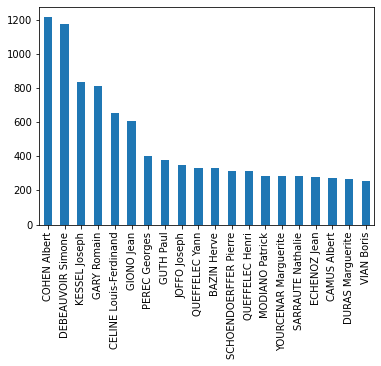

In [100]:
data_lim.author.value_counts().plot(kind="bar");

In [110]:
car = pd.DataFrame(data_lim.author.value_counts())

In [111]:
car

,author
COHEN Albert,1212
DEBEAUVOIR Simone,1171
...,...
DURAS Marguerite,265
VIAN Boris,257


In [72]:
#define variables
min_lines = data_lim.author.value_counts().min()
last_author = data_lim.author.value_counts().index[-1]
author_without_last = data_lim.author.value_counts().index[:-1].to_list()

In [73]:
author_without_last 

['COHEN Albert',
 'DEBEAUVOIR Simone',
 'KESSEL Joseph',
 'GARY Romain',
 'CELINE Louis-Ferdinand',
 'GIONO Jean',
 'PEREC Georges',
 'GUTH Paul',
 'JOFFO Joseph',
 'QUEFFELEC Yann',
 'BAZIN Herve',
 'SCHOENDOERFFER Pierre',
 'QUEFFELEC Henri',
 'YOURCENAR Marguerite',
 'MODIANO Patrick',
 'SARRAUTE Nathalie',
 'ECHENOZ Jean',
 'CAMUS Albert',
 'DURAS Marguerite']

In [74]:
#Downsample majority classPython
# Separate majority and minority classes

df_minority = data_lim[data_lim.author==last_author]
df_minority

,text,author,taille
1453,"Que devient donc Jacquemort ? pensa-t-elle à ce propos ou vice versa. Je ne le vois plus guère. Ça vaut autant. Sous prétexte qu’il est à la fois psychiatre et psychanalyste, il se mêlerait peut-être de l’éducation de Joël, Noël et de Citroën. Et de quel droit, on se le demande. Les enfants appartiennent à leur mère. Puisqu’elles ont eu mal en les faisant, ils appartiennent à leur mère. Et pas à leur père. Et leurs mères les aiment, par conséquent, il faut qu’ils fassent ce qu’elles disent. Elles savent mieux qu’eux ce qu’il leur faut, ce qui est bon pour eux, ce qui fera qu’ils resteront des enfants le plus longtemps possible. Les pieds des Chinoises. Les Chinoises, on leur met les pieds dans des chaussures spéciales. Peut-être des bandelettes. Ou des petits étaux. Ou des moules d’acier. Mais en tout cas, on s’arrange pour que leurs pieds restent tout petits. On devrait faire la même chose avec les enfants entiers. Les empêcher de grandir. Ils sont bien mieux à cet âge-là. Ils n’ont pas de soucis. Ils n’ont pas de besoins. Ils n’ont pas de mauvais désirs. Plus tard, ils vont pousser. Ils vont étendre leur domaine. Ils vont vouloir aller plus loin. Et que de risques nouveaux. S’ils sortent du jardin, il y a mille dangers supplémentaires. Que dis-je mille ? Dix mille. Et je ne suis pas généreuse. Il faut éviter à tout prix qu’ils sortent du jardin. Déjà, dans le jardin, ils courent un nombre incalculable de risques. Il peut y avoir un coup de vent imprévu qui casse une branche et les assomme. Que la pluie survienne, et, s’ils sont en sueur après avoir joué au cheval, ou au train, ou au gendarme et au voleur, ou à un autre jeu courant, que la pluie survienne et ils vont attraper une congestion pulmonaire, ou une pleurésie, ou un froid, ou une crise de rhumatismes, ou la poliomyélite, ou la typhoïde, ou la scarlatine, ou la rougeole, ou la varicelle, ou cette nouvelle maladie dont personne ne sait encore le nom. Et si un orage se lève. La foudre. Les éclairs. Je ne sais pas, il peut même y avoir ce qu’ils disent, ces phénomènes d’ionisation, ça a un assez sale nom pour que ça soit terrible, ça rappelle inanition. Et il peut arriver tant d’autres choses. S’ils sortaient du jardin, cela serait évidemment bien pire. Mais n’y pensons pas pour l’instant. Il y a assez à faire pour épuiser toutes les possibilités propres du jardin. Et quand ils seront plus grands, ah ! la ! la ! Oui, voilà les deux choses terrifiantes, évidemment : qu’ils grandissent et qu’ils sortent du jardin. Que de dangers à prévoir. C’est vrai, une mère doit tout prévoir. Mais laissons ça de côté. Je réfléchirai à tout ça un peu plus tard ; je ne l’oublie pas : grandir et sortir. Mais je veux me contenter du jardin pour le moment. Rien que dans le jardin, le nombre d’accidents est énorme. Ah ! Justement ! le gravier des allées. Combien de fois n’ai-je pas dit qu’il était ridicule de laisser les enfants jouer avec le gravier. S’ils en avalent ? On ne peut pas s’en apercevoir tout de suite. Et trois jours après, c’est l’appendicite. Obligé d’opérer d’urgence. Et qui le ferait ? Jacquemort ? Ce n’est pas un docteur. Le médecin du village ? Il n’y a qu’un vétérinaire. Alors, ils mourraient, tout simplement. Et après avoir souffert. La fièvre. Leurs cris. Non, pas de cris, ils gémiraient, ce serait encore plus horrible. Et pas de glace. Impossible de trouver de la glace pour leur mettre sur le ventre. La température monte, monte. Le mercure dépasse la limite. Le thermomètre éclate. Et un éclat de verre vient crever l’œil de Joël qui regarde Citroën souffrir. Il saigne. Il va perdre l’œil. Personne pour le soigner. Tout le monde est occupé de Citroën, qui geint de plus en plus doucement. Profitant du désordre, Noël se faufile dans la cuisine. Une bassine d’eau bouillante sur le fourneau. Il a faim. On ne lui a pas donné son goûter, naturellement, ses frères malades, on l’oublie. Il monte sur une chaise devant le fourneau. Pour prendre le pot de 

In [75]:
from sklearn.utils import resample 

#Downsample majority classPython

#df_downsampled=pd.DataFrame(columns=['text','author','title','book_date'])
df_all = []

for _ in author_without_last:
    df_majority = data_lim[data_lim.author==_]


    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                     replace=False,    # sample without replacement
                                     n_samples=min_lines,     # to match minority class
                                     random_state=123) # reproducible results
    
    df_all.append(df_majority_downsampled)

# Combine minority class with downsampled majority class
df_all.append(df_minority)
df_downsampled = pd.concat(df_all, ignore_index= True, axis=0)    

In [76]:
df_downsampled.author.value_counts()

COHEN Albert         127
DEBEAUVOIR Simone    127
                    ... 
KESSEL Joseph        127
VIAN Boris           127
Name: author, Length: 20, dtype: int64

In [77]:
df_downsampled

,text,author,taille
0,"persécutions au renoncement. Qui préférait la honte au renoncement. Qui préférait les massacres, l’ignominie même. Au Moyen Âge, tous ceux qui avaient préféré la mort à l’apostasie. À Carentan, à Blois, à Bray, à Nuremberg, à Verdun, à Worms, à Francfort, à Oppenheim, à Mayence, à Burgos, à Barcelone, à Tolède, à Trente et dans d’autres villes, tous ces vaillants qui n’avaient pas voulu renier leur Dieu, qui avaient mis le feu à leurs maisons et s’étaient lancés dans les flammes, en tenant leurs enfants dans leurs bras et en chantant des psaumes. Ces héros, ces humiliés pour Dieu, ces grands nostalgiques de Dieu, ces faméliques errants à travers les siècles. Ce peuple passionné et fort qui avait traversé l’histoire comme une épée et qui avait marqué la terre de sa marque royale et de son Dieu. Ce peuple sublime d’espoir à travers les déserts vers Chanaan et dans les captivités en tant de terres étrangères. Ce peuple qui avait tenu tête, dans sa sainte bourgade, à Rome, et qui avait fait trembler le plus puissant des empires. Ce peuple de l’Esprit. Ce peuple du demain éternel. [sep] Pauvres raisons. En réalité, elle aurait dû avoir le courage de partir. Qu’avait-elle fait en ces trente-deux ans de vie, à quoi avait-elle servi et pourquoi était-elle née ? Tout de même, elle avait été jeune et pleine de feu, elle aussi. Et maintenant, elle se laissait vivre et ne croyait à rien. Tout aurait pu être différent. Et encore, cet amour lui donnait-il de la joie ? Non, une affection sauvage et triste de bête désemparée. Oh, avoir un petit enfant à elle, sans toutes ces vilenies de lettres truquées. « Gâde, gâde, maman, le ouaou ouaou ! » Pourquoi Maussane avait-il si vite accepté que sa fille rejoignît Jacques à Versailles ? Évidemment, elle était là, elle, le chaperon. Ces scrupules de moralité lui seyaient à elle ! La maîtresse de Maussane vivait sans doute avec lui et il préférait éloigner sa fille. Comme tout était misérable. Ce vieux, qui mourrait dans cinq ou six ans, avait besoin d’une femme. Mais qu’avons-nous tous, pauvres humains, à vouloir nous serrer contre un autre corps ? Depuis la lettre, comme Aude la méprisait ! Elle se laissait traiter par cette petite comme une domestique commode. Autrefois, elle était fière et maintenant, elle suivait lâchement, sans bien savoir pourquoi. Pour surveiller sans doute, pour espionner. Tout de même comme cette petite avait su se reprendre. [sep] — Je ne suis pas beau évidemment, mais plus je me regarde plus je m’aperçois que je ne suis pas laid non plus. Il faut être impartial. Figure sympathique, vive, ouverte, franche et non dénuée d’intelligence et peut-être même de malice. Le rabbin mon beau-frère me fait des sermons parce que je me rase, il prétend qu’il y a impudeur à montrer sa face nue. J’ai l’âme aussi pure que vous, ô très magnifique Gamaliel Solal, ô éminentissime grand rabbin de la Communauté des Sept Îles Ioniennes avec siège à Céphalonie ! Et s’il me plaît à moi d’être pareil aux Saxons quant à la face ? Mais je ne veux pas me fâcher. Ah, le cadeau pour le neveu de mon âme, le petit cadeau. Solal des Solal. Il a le même prénom et le même nom. Enfin je me comprends. C’est une tradition, messieurs, dans cette grande famille. (Rictus respectueux à gauche pour les Solal et à droite méprisant pour toutes les autres familles.) Toutes les deux générations, le premier-né du chef de la famille s’appelle Solal des Solal. Cela me plaît. Moi je l’appelle Sol. C’est plus affectueux. Les autres ont pris l’habitude de l’appeler Sol aussi, ce qui ne me plaît point. Bref, tant pis. Et qui est le vrai papa de cet enfant ? C’est moi puisqu’il m’aime plus que son père. Ah ah, messieurs de la Richesse, à nous deux ! Saltiel vainqueur éternel ! [sep] — Imbécile ! articula-t-il. Ô idiote, je t’ai fait ce royal hommage d’être sincère et désarmé. Tu m’as vu à genoux, moi ! Le mépris que j’ai toujours éprouvé pour la femme, comme il était juste. Avant ma naissance, je détestai

In [78]:
X_0pre = df_downsampled["text"].to_numpy()
y_0pre = df_downsampled["author"].to_numpy()

In [79]:
import joblib

joblib.dump(X_0pre,f"X_0pre_{seq_len}.pkl")
joblib.dump(y_0pre,f"y_0pre_{seq_len}.pkl")

['y_0pre_1024.pkl']

In [ ]:
def dict_proba(pred):
  
  list_dicts = []
  authors = cat_transformer.classes_ #label encoder

  for probas in pred:
    i = 0
    dict = {}
    for proba in probas:
      dict[authors[i]] = round(proba,4)
      i = i+1
    list_dicts.append(dict)
  
  return list_dicts

In [81]:
proba = [1.8824009e-07, 3.3401844e-01, 5.0492155e-05, 3.3612199e-05, 7.3939465e-02,
 1.1347712e-01, 7.5885514e-04, 2.7993086e-01, 4.8975877e-02, 1.8440338e-04,
 2.5028788e-02, 4.6786014e-02, 2.0136466e-02 ,3.5923633e-05, 4.6142832e-05,
 9.3711233e-06, 1.8443435e-02, 8.6399080e-04, 3.6973104e-02, 3.0744291e-04]

[1.8824009e-07,
 9.3711233e-06,
 3.3612199e-05,
 3.5923633e-05,
 4.6142832e-05,
 5.0492155e-05,
 0.00018440338,
 0.00030744291,
 0.00075885514,
 0.0008639908,
 0.018443435,
 0.020136466,
 0.025028788,
 0.036973104,
 0.046786014,
 0.048975877,
 0.073939465,
 0.11347712,
 0.27993086,
 0.33401844]

In [86]:
sorted(proba)[0:3]

[1.8824009e-07, 9.3711233e-06, 3.3612199e-05]